In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://bit.ly/HDSC-StageOneDataset')

In [3]:
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


# QUESTION 4

In [4]:
#standard deviation and fourth percentile can be gotten from the visualization below

df.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
record_id                       29523 non-null object
utility_id_ferc1                29523 non-null int64
report_year                     29523 non-null int64
plant_name_ferc1                29523 non-null object
fuel_type_code_pudl             29523 non-null object
fuel_unit                       29343 non-null object
fuel_qty_burned                 29523 non-null float64
fuel_mmbtu_per_unit             29523 non-null float64
fuel_cost_per_unit_burned       29523 non-null float64
fuel_cost_per_unit_delivered    29523 non-null float64
fuel_cost_per_mmbtu             29523 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [6]:
df.duplicated().any()

False

# QUESTION 6 and 7; missing values

In [7]:
df.isnull().any()

record_id                       False
utility_id_ferc1                False
report_year                     False
plant_name_ferc1                False
fuel_type_code_pudl             False
fuel_unit                        True
fuel_qty_burned                 False
fuel_mmbtu_per_unit             False
fuel_cost_per_unit_burned       False
fuel_cost_per_unit_delivered    False
fuel_cost_per_mmbtu             False
dtype: bool

In [8]:
df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [ ]:
df.isnull().

In [25]:
df['fuel_unit'].value_counts()

mcf       11534
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

In [9]:
df.groupby(['fuel_unit'])['fuel_unit'].count()

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

In [10]:
df['fuel_unit'] = df['fuel_unit'].fillna(value = 'mcf')

In [11]:
df['fuel_unit'].isnull().sum()

0

In [12]:
df.groupby('report_year')['report_year'].count()

report_year
1994    1235
1995    1201
1996    1088
1997    1094
1998    1107
1999    1050
2000    1373
2001    1356
2002    1205
2003    1211
2004    1192
2005    1269
2006    1243
2007    1264
2008    1228
2009    1222
2010    1261
2011    1240
2012    1243
2013    1199
2014    1171
2015    1093
2016    1034
2017     993
2018     951
Name: report_year, dtype: int64

In [13]:
df['report_year'].value_counts()

2000    1373
2001    1356
2005    1269
2007    1264
2010    1261
2006    1243
2012    1243
2011    1240
1994    1235
2008    1228
2009    1222
2003    1211
2002    1205
1995    1201
2013    1199
2004    1192
2014    1171
1998    1107
1997    1094
2015    1093
1996    1088
1999    1050
2016    1034
2017     993
2018     951
Name: report_year, dtype: int64

In [14]:
df.groupby('fuel_type_code_pudl').first()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


In [15]:
df.groupby('fuel_type_code_pudl')['fuel_type_code_pudl'].count()

fuel_type_code_pudl
coal        8547
gas        11486
nuclear      818
oil         8064
other        167
waste        441
Name: fuel_type_code_pudl, dtype: int64

In [44]:
df.groupby('report_year')['fuel_type_code_pudl']['fuel_cost_per_unit_burned'].count()

IndexError: Column(s) fuel_type_code_pudl already selected

In [16]:
df1 = df.iloc[0:19000].reset_index(drop = True)
df2 = df.iloc[19000:].reset_index(drop = True)

assert len(df) == (len(df1) + len(df2))

Text(0.5, 0, 'Fuel Unit')

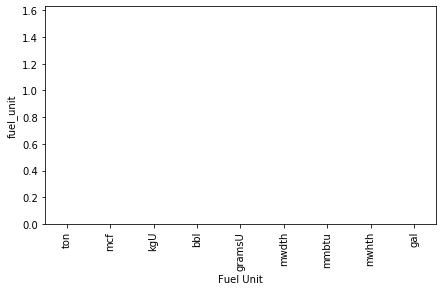

In [35]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=90)

sns.barplot(x = df['fuel_unit'], y = df['fuel_unit'].value_counts(), data = df )
plt.xlabel('Fuel Unit')

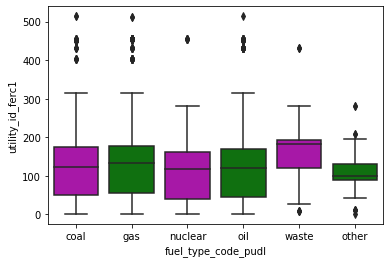

In [17]:
sns.boxplot(x="fuel_type_code_pudl", y="utility_id_ferc1", palette=["m", "g"], data=df)

In [18]:
sample_df = df.sample(n=50, random_state=4)

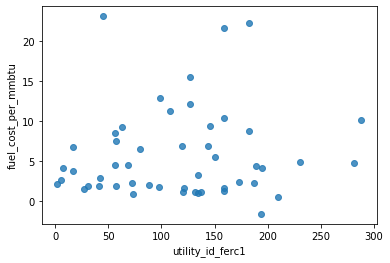

In [19]:
sns.regplot(x=sample_df["utility_id_ferc1"], y=sample_df["fuel_cost_per_mmbtu"], fit_reg=False)

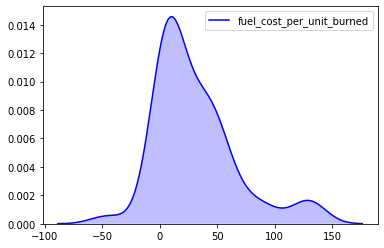

In [20]:
sns.kdeplot(sample_df['fuel_cost_per_unit_burned'], shade=True, color="b")

In [21]:
df.nunique(axis = 0)

record_id                       29523
utility_id_ferc1                  185
report_year                        25
plant_name_ferc1                 2315
fuel_type_code_pudl                 6
fuel_unit                           9
fuel_qty_burned                 26432
fuel_mmbtu_per_unit             11227
fuel_cost_per_unit_burned       19416
fuel_cost_per_unit_delivered    16675
fuel_cost_per_mmbtu             12605
dtype: int64

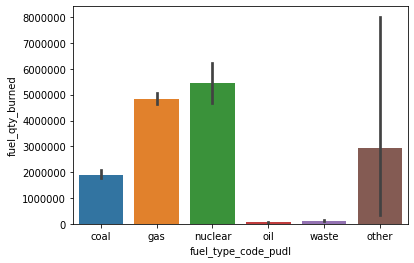

In [22]:
sns.barplot(x = 'fuel_type_code_pudl', y = 'fuel_qty_burned', data = df )

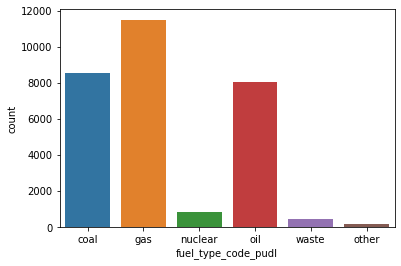

In [23]:
sns.countplot(x = 'fuel_type_code_pudl', data = df)

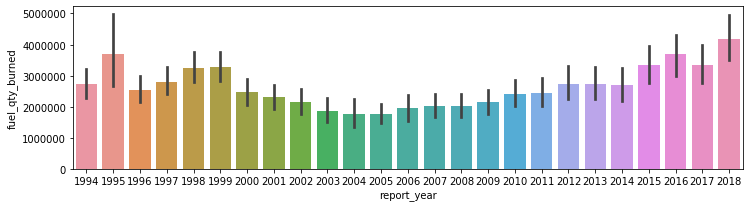

In [24]:
plt.figure(figsize=(12, 3))

sns.barplot(x = 'report_year', y = 'fuel_qty_burned', data = df )

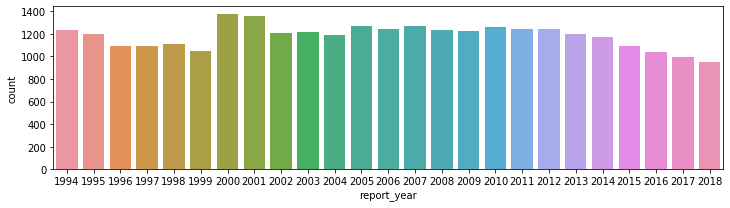

In [25]:
plt.figure(figsize=(12, 3))
sns.countplot(x = 'report_year', data = df)

# QUESTION 8

In [38]:
#the third and second lowest correlation with the fuel cost per unit burned

df.corr()


,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


# QUESTION 10

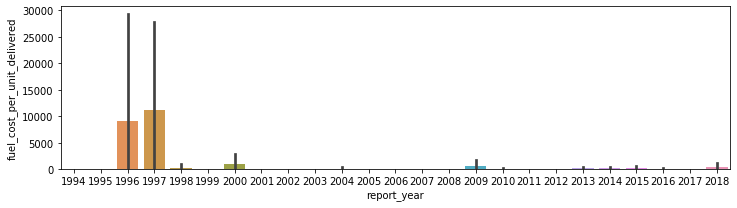

In [49]:
#the year with the highest average fuel cost per unit delivered

plt.figure(figsize=(12, 3))

sns.barplot(x = 'report_year', y = 'fuel_cost_per_unit_delivered', data = df)

# QUESTION 3

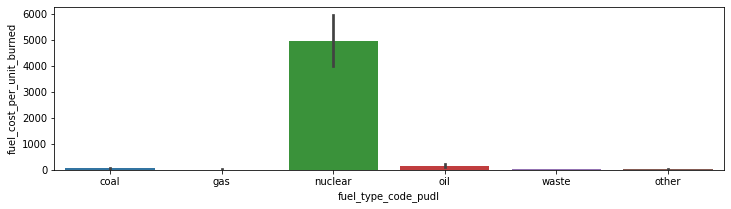

In [50]:
#The lowest average fuel cost per unit burned


plt.figure(figsize=(12, 3))

sns.barplot(x = 'fuel_type_code_pudl', y = 'fuel_cost_per_unit_burned', data = df )

In [51]:
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew


# QUESTION 5

In [52]:
print( 'excess kurtosis of normal distribution is: {}'.format( kurtosis(df['fuel_qty_burned']) ))
print( 'skewness of normal distribution is : {}'.format( skew(df['fuel_qty_burned']) ))

excess kurtosis of normal distribution is: 651.2589365474387
skewness of normal distribution is : 15.850690077422112


In [60]:
year = df.groupby(['report_year','fuel_type_code_pudl'] )

In [61]:
year.first()

record_id  utility_id_ferc1  \
report_year fuel_type_code_pudl                                               
1994        coal                    f1_fuel_1994_12_1_0_7                 1   
            gas                    f1_fuel_1994_12_2_0_10                 2   
            nuclear                 f1_fuel_1994_12_2_1_1                 2   
            oil                     f1_fuel_1994_12_6_0_2                 6   
            other                  f1_fuel_1994_12_11_0_6                11   
...                                                   ...               ...   
2018        coal                  f1_fuel_2018_12_122_0_4               122   
            gas                  f1_fuel_2018_12_122_0_10               122   
            nuclear                f1_fuel_2018_12_7_5_14                 7   
            oil                   f1_fuel_2018_12_122_0_2               122   
            waste                 f1_fuel_2018_12_186_0_2               186   

                                 plant_name_ferc1 fuel_unit  fuel_qty_burned  \
report_year fuel_type_code_pudl                                                
1994        coal                         rockport       ton        5377489.0   
            gas                         chickasaw       mcf          40533.0   
            nuclear              joseph m. farley       kgU           2260.0   
            oil                      clinch river       bbl           6510.0   
            other                      w.f. wyman       bbl          55652.0   
...                                           ...       ...              ...   
2018        coal                           coyote       ton         238875.0   
            gas                       huron ct #1     mmbtu         177404.0   
            nuclear                  palo verde 1       kgU            511.0   
            oil                         big stone       bbl           2344.0   
            waste                       altavista       ton         415778.0   

                                 fuel_mmbtu_per_unit  \
report_year fuel_type_code_pudl                        
1994        coal                           16.590000   
            gas                             1.000000   
            nuclear                         0.064094   
            oil                             5.875338   
            other                           0.149719   
...                                              ...   
2018        coal                           13.926000   
            gas                             1.000000   
            nuclear                         0.066704   
            oil                             5.880000   
            waste                           0.005212   

                                 fuel_cost_per_unit_burned  \
report_year fuel_type_code_pudl                              
1994        coal                                    18.590   
            gas                                      2.770   
            nuclear                                 28.770   
            oil                                     32.130   
            other                                   14.685   
...                                                    ...   
2018        coal                                    25.425   
            gas                                      3.531   
            nuclear                              44738.780   
            oil                                     63.123   
            waste                                   29.670   

                                 fuel_cost_per_unit_delivered  \
report_year fuel_type_code_pudl                                 
1994        coal                                       18.530   
            gas                                         2.770   
            nuclear                                     0.000   
            oil                                        23.444   
            other                                    

In [64]:
year.get_group((1994, 1998))

KeyError: (1994, 1998)